# Učitavanje i osnovni prikaz podataka

In [1]:
import os 
import tarfile 
import urllib
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

csv_path=os.path.join("https://raw.githubusercontent.com/iJovanGG/MachineLearning/master/datasets/income/", "adult.csv")

income = pd.read_csv(csv_path)
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  yearly-income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
categoryColumns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'yearly-income']
for col in categoryColumns:
    income.drop(income[income[col] == '?'].index, inplace=True)

In [4]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  yearly-income   30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.7+ MB


In [5]:
income["workclass"].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [6]:
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Statistike

<Figure size 432x288 with 0 Axes>

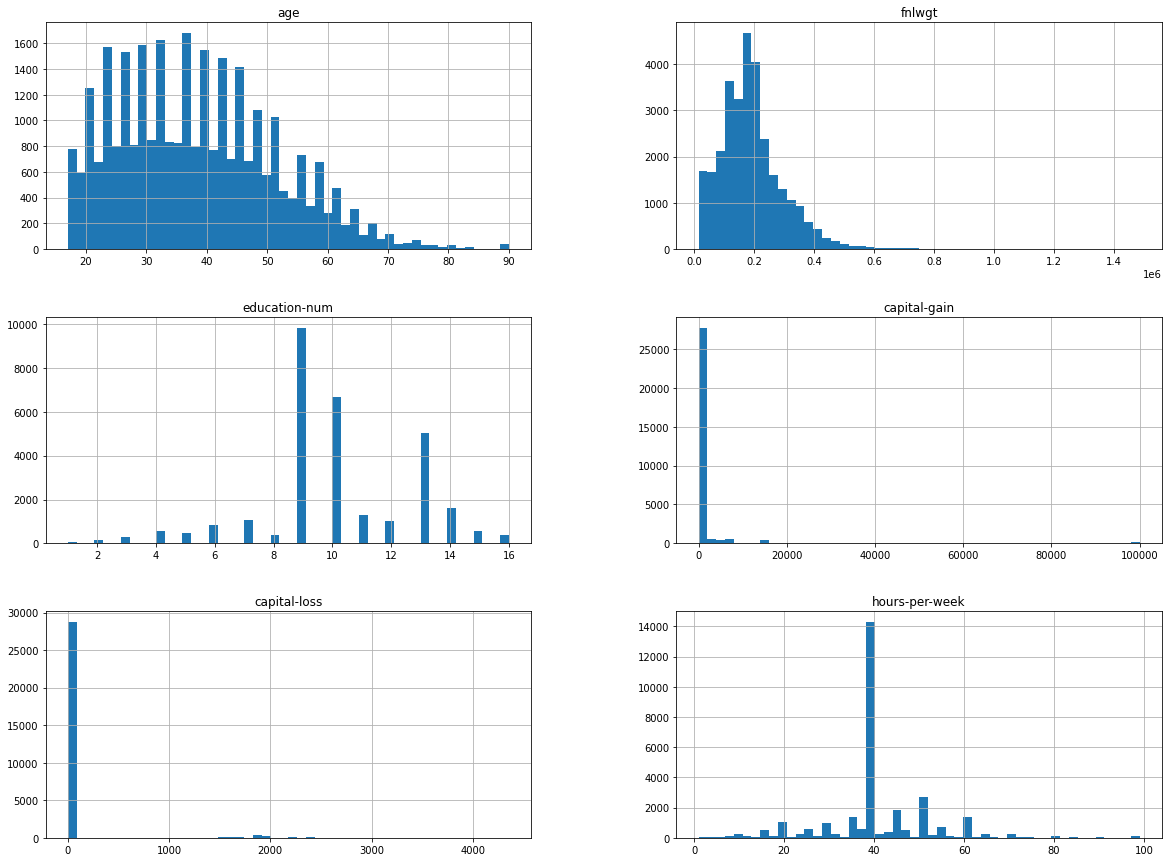

In [7]:
#import matplotlib.pyplot as plt

plt.set_cmap("Greens")
income.hist(bins=50, figsize=(20,15))

plt.show()

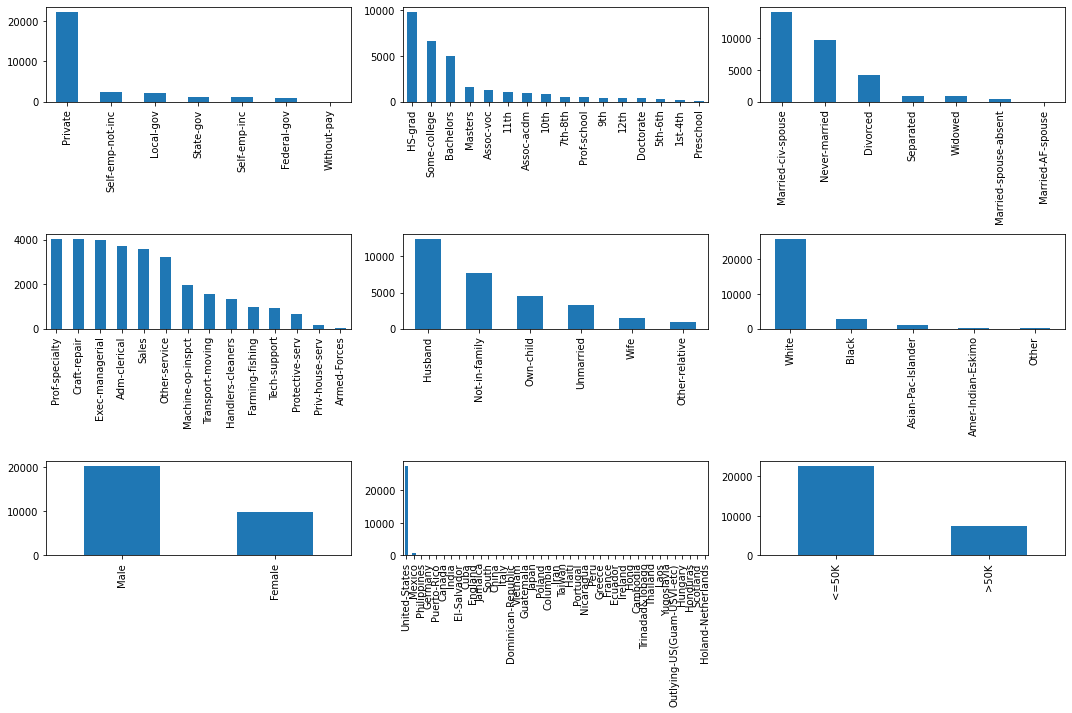

In [8]:
#fig, ax = plt.subplots()
#ax.plot(income['race'], income['race'].value_counts())
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for col, ax in zip(categoryColumns, axes.flatten()):
    income[col].value_counts().plot(kind='bar', ax = ax)
plt.tight_layout()  
plt.show()

In [9]:
income['yearly-income'].value_counts()

<=50K    22654
>50K      7508
Name: yearly-income, dtype: int64

In [10]:
income_all = income['yearly-income'].value_counts(normalize = True)
income_all*100

<=50K    75.107751
>50K     24.892249
Name: yearly-income, dtype: float64

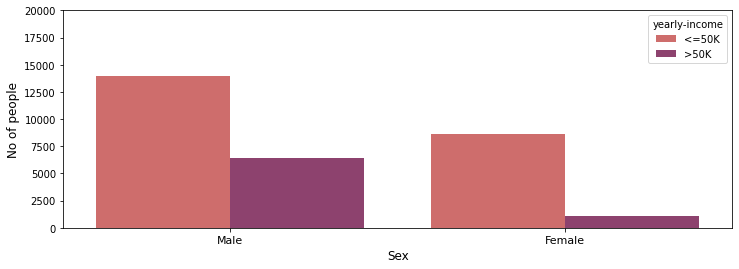

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(data = income, x = 'sex', hue="yearly-income", palette = 'flare')
plt.xlabel("Sex", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
plt.ylim(0,20000) 
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.show()

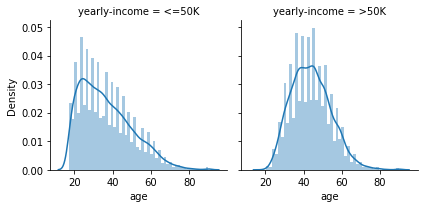

In [12]:

g = sns.FacetGrid(income, col='yearly-income')
g = g.map(sns.distplot, "age")



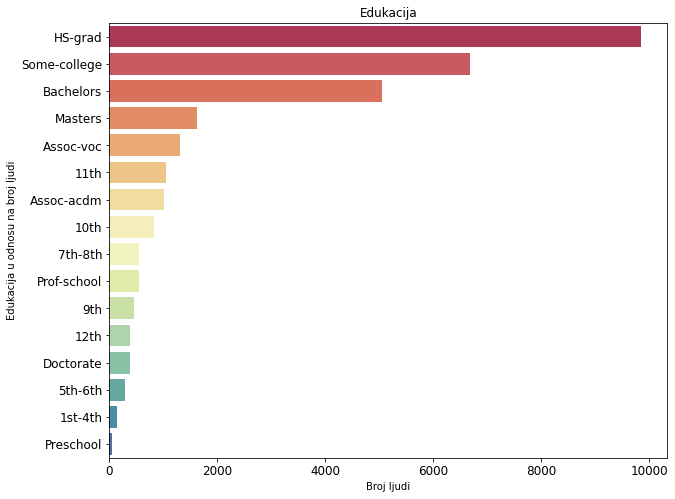

In [13]:
plt.figure(figsize=(10,8))

education = income["education"].value_counts()
sns.barplot(education.values, education.index, palette='Spectral')
plt.title('Edukacija')
plt.xlabel('Broj ljudi')
plt.ylabel('Edukacija u odnosu na broj ljudi')
plt.tick_params(labelsize=12)
plt.show()

In [14]:
income['race'].value_counts()

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

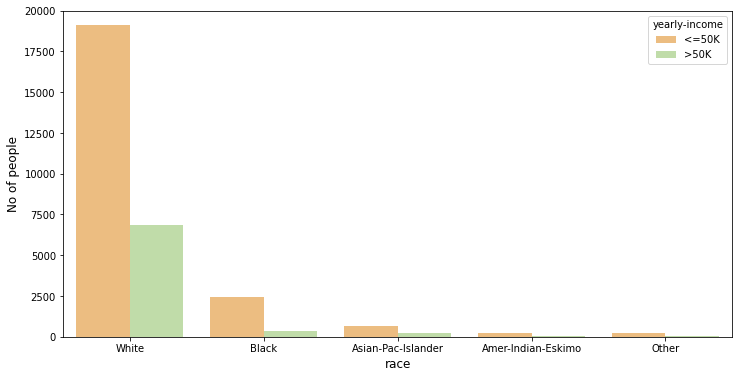

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data = income, x = 'race', hue="yearly-income", palette = 'Spectral')
plt.xlabel("race", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
plt.ylim(0,20000) 
plt.show()

income['marital-status'].value_counts()

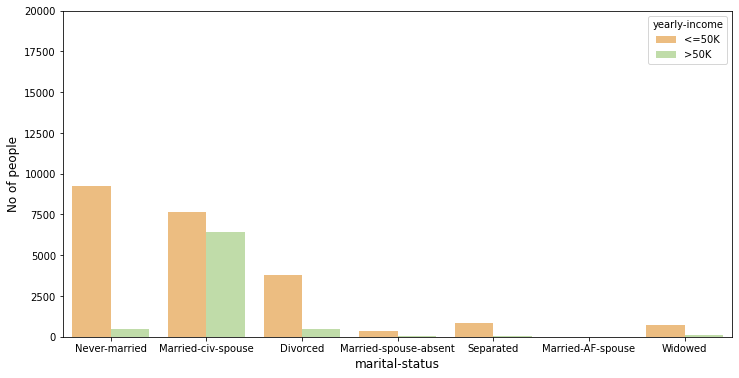

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data = income, x = 'marital-status', hue="yearly-income", palette = 'Spectral')
plt.xlabel("marital-status", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
plt.ylim(0,20000) 
plt.show()

In [17]:
#income['workclass'].value_counts()

In [18]:
#income['native-country'].value_counts()

In [19]:
#income.isin(['?']).sum()

In [20]:
#income['occupation'].value_counts()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
income['yearly-income'] = le.fit_transform(income['yearly-income'])

In [22]:
from sklearn.preprocessing import LabelEncoder
for col in income.columns:
    if income[col].dtypes == 'object':
        le = LabelEncoder()        
        income[col] = le.fit_transform(income[col].astype(str))

In [23]:
income.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
6,49,2,160187,6,5,3,7,1,2,0,0,0,16,22,0
7,52,4,209642,11,9,2,3,0,4,1,0,0,45,38,1
8,31,2,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,2,159449,9,13,2,3,0,4,1,5178,0,40,38,1


# Korelacija ulaza

In [24]:
income.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
age,1.000000,0.080540,-0.076511,-0.001111,0.043526,-0.276373,-0.005682,-0.246456,0.023374,0.081993,0.080154,0.060165,0.101599,-0.001905,0.241998
workclass,0.080540,1.000000,-0.032493,0.017855,0.037833,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.035350,0.007204,0.050724,0.007668,0.018044
fnlwgt,-0.076511,-0.032493,1.000000,-0.027102,-0.044992,0.032163,0.000204,0.009298,-0.023895,0.025362,0.000422,-0.009750,-0.022886,-0.066717,-0.008957
education,-0.001111,0.017855,-0.027102,1.000000,0.345410,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.030575,0.015028,0.059887,0.078790,0.078987
education-num,0.043526,0.037833,-0.044992,0.345410,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.124416,0.079646,0.152522,0.091555,0.335286
marital-status,-0.276373,-0.034241,0.032163,-0.040664,-0.063419,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.042418,-0.035203,-0.189003,-0.025902,-0.193518
occupation,-0.005682,0.015572,0.000204,-0.038212,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062313,0.022162,0.014607,0.018365,-0.003483,0.051577
relationship,-0.246456,-0.067417,0.009298,-0.012717,-0.091935,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.058259,-0.063567,-0.257850,-0.010809,-0.251003
race,0.023374,0.044731,-0.023895,0.011154,0.032805,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.014353,0.023517,0.048532,0.124514,0.071658
sex,0.081993,0.074973,0.025362,-0.027888,0.006157,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.048814,0.047011,0.231268,0.000618,0.216699


In [25]:
X = income.drop("yearly-income",axis=1).drop('relationship', 1)
y = income.iloc[:,-1:]

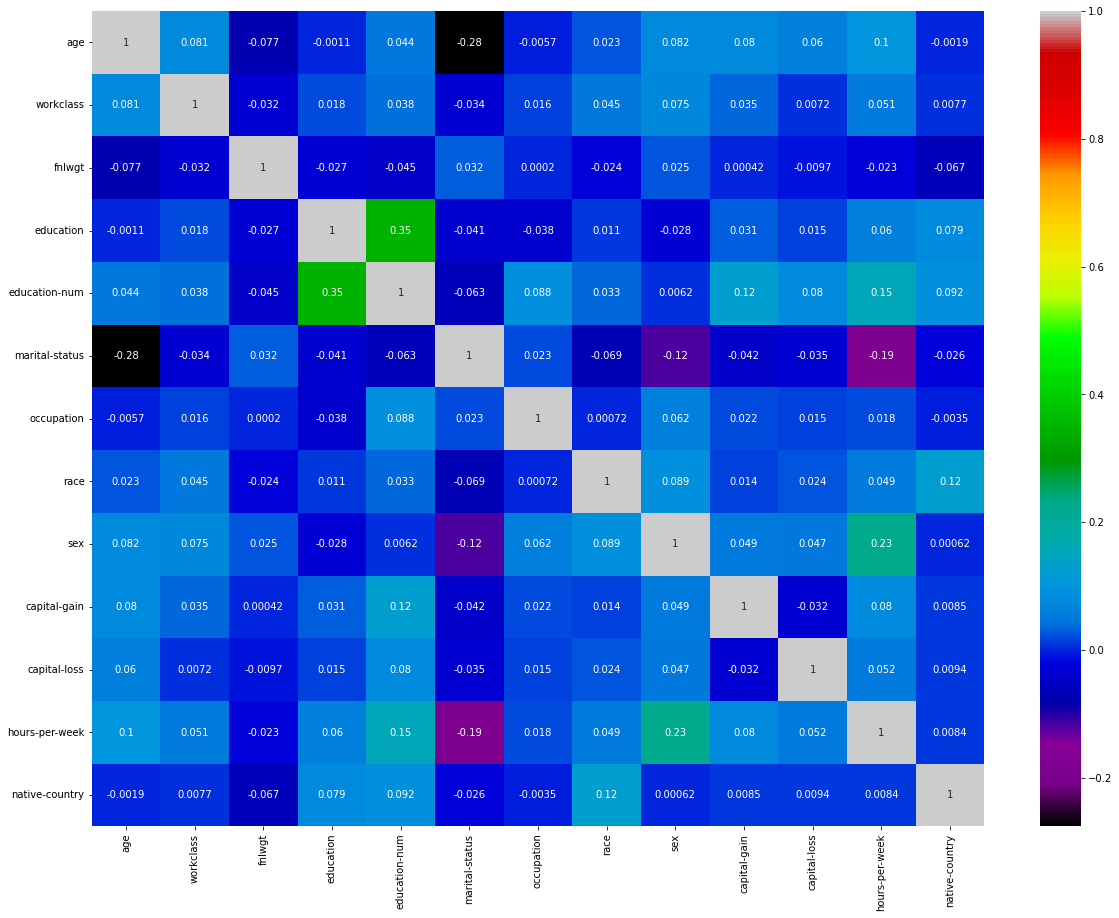

In [26]:
plt.subplots(figsize=(20,15))
sns.heatmap(X.corr(), annot=True, cmap="nipy_spectral")
plt.show()

# Generisanje i testiranje modela

In [27]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler 

## Balansiranje podataka

In [28]:
random_sampler = RandomOverSampler(random_state=30)

random_sampler.fit(X,y)
X_new,y_new = random_sampler.fit_resample(X, y)
y_new.value_counts(normalize=True)

yearly-income
0                0.5
1                0.5
dtype: float64

In [29]:
models = []
models.append(('Decision Tree', DecisionTreeClassifier(max_depth=3)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Stochastic Gradient Decent', SGDClassifier(max_iter=5, tol=None)))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNeighbors', KNeighborsClassifier(n_neighbors = 3)))
models.append(('Naive Bayes', GaussianNB()))



def TrainAndCompare(X_train, X_test, y_train, y_test):
    results = {'Model': [], 'Score': []}         
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    
    for model, ax in zip(models, axes.flatten()):
        modelToCall = model[1]
        modelToCall.fit(X_train,y_train)
        prediction = modelToCall.predict(X_test)
        rounded = round(metrics.accuracy_score(y_test, prediction) * 100, 2)
        results['Model'].append(model[0])
        results['Score'].append(rounded)
        plot_confusion_matrix(modelToCall, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues')
        ax.title.set_text(model[0])

        
    plt.tight_layout()  
    plt.show()
        

    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(by='Score', ascending=False)
    result_df = result_df.set_index('Score')
    return result_df;
    
    

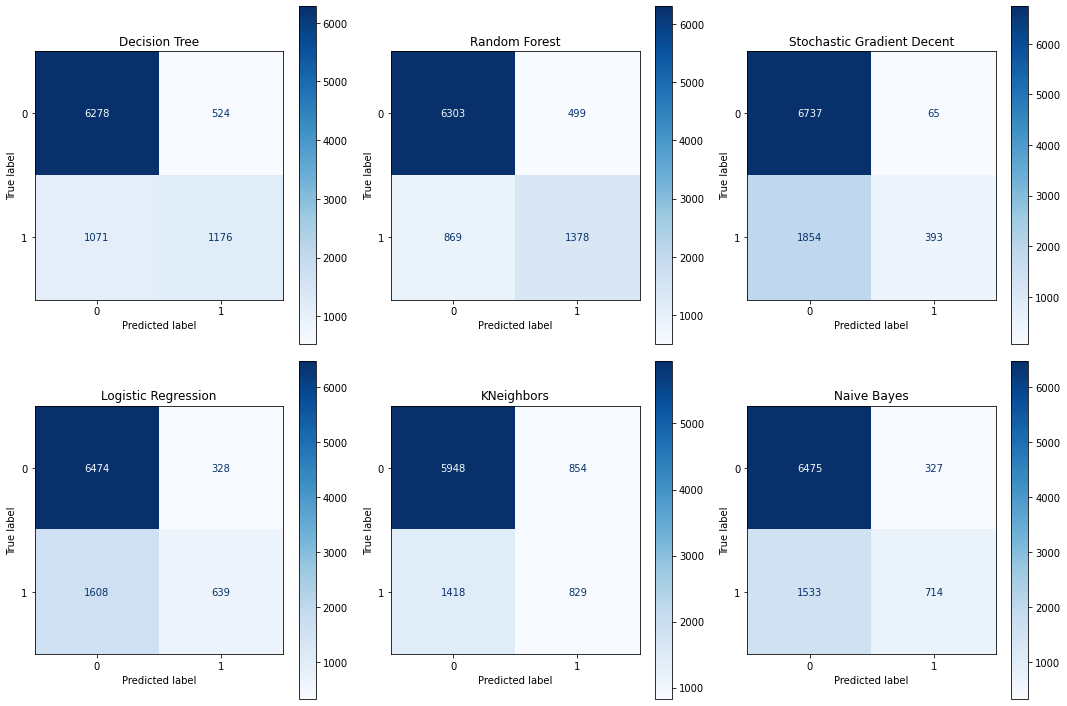

,Model
Score,
84.88,Random Forest
82.37,Decision Tree
79.45,Naive Bayes
78.79,Stochastic Gradient Decent
78.61,Logistic Regression
74.89,KNeighbors


In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)
TrainAndCompare(X_train, X_test, y_train, y_test).head(9)

<AxesSubplot:xlabel='feature'>

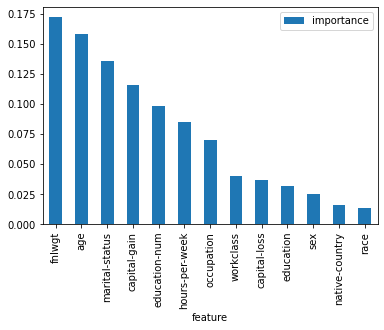

In [31]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(models[1][1].feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

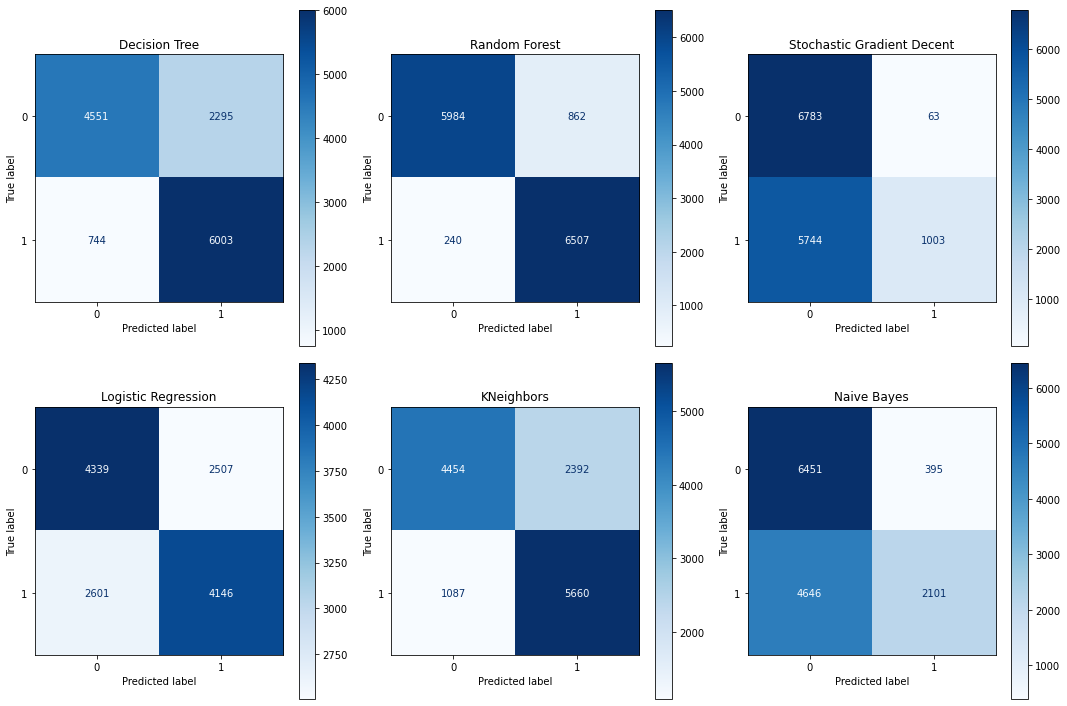

,Model
Score,
91.89,Random Forest
77.64,Decision Tree
74.41,KNeighbors
62.91,Naive Bayes
62.42,Logistic Regression
57.28,Stochastic Gradient Decent


In [32]:
X_train, X_test, y_train, y_test = train_test_split( X_new, y_new, test_size=0.30)
TrainAndCompare(X_train, X_test, y_train, y_test).head(9)

<AxesSubplot:xlabel='feature'>

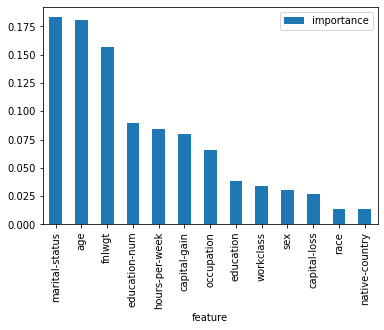

In [33]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(models[1][1].feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

# Najbolji algoritam

In [34]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")
print("Accuracy:",metrics.accuracy_score(y_test, Y_prediction))
print("F1 Score: ", round(f1_score(y_test,Y_prediction) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,Y_prediction) * 100,3))

oob score: 92.08 %
Accuracy: 0.9193702641065254
F1 Score:  92.224
MSE:  8.063
